## Imports

In [1]:
import glob
from typing import List

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Loading Data

In [2]:
original_img_paths = glob.glob("./original_images_cs558_bw1/*")

In [3]:
from PIL import Image

def load_pgm(filename: str) -> List[List[int]]:
    '''Allows us to convert images from its binary form to a 2D list representing the grayscale image.'''
    with Image.open(filename) as img:
        # Convert the image to grayscale
        img = img.convert('L')

        # Get image data as a list of lists (2D list)
        image_data = list(img.getdata())
        width, height = img.size
        print(f"Dimensions of {filename}: {width} x {height}")
        image_data = [image_data[i * width: (i + 1) * width] for i in range(height)]

    return image_data


In [4]:
original_images_list = [
    load_pgm(filename) for filename in original_img_paths
]

Dimensions of ./original_images_cs558_bw1/red.pgm: 321 x 481
Dimensions of ./original_images_cs558_bw1/plane.pgm: 481 x 321
Dimensions of ./original_images_cs558_bw1/kangaroo.pgm: 481 x 321


In [5]:
original_images_dict = dict(zip(
    ["Red", "Plane", "Kangroo"], original_images_list
))

## Gaussian Filtering of the Input Image

Based on an earlier run of this code, we visualized Gaussian smoothening of all 3 images using `sigma` values from 1 to 10:
![All the images + their smoothed versions, using sigma 1-10](./part_1_smoothed_images/attempt-1-incorrect-padding.png)

Unfortunately, these images got clipped accidentally because I messed up my zero padding function 😅.
So for the visualization below - we'll run the smoothening function again. And as per the submission requirements, we'll only use 2 different `sigma` values - specifically, `3` and `8`:

In [6]:
from mpl_toolkits.axes_grid1 import ImageGrid
from problem1 import GaussianDerivativeFilter

In [7]:
# get a 1D array of all the images, smoothed at all values of sigma:
detector = GaussianDerivativeFilter()
smoothed_images_all2 = list()
sigma_values = [3, 8]  # originally, this was len(range(1, 11))

for image_name, image in original_images_dict.items():
    # first, add the normal image for comparison later on
    smoothed_images = [(image_name, image)]
    for sigma in sigma_values:
        filter_matrix = detector.create_gaussian_filter(sigma)
        smoothed_image = detector.smooth(image, filter_matrix)
        smoothed_images.append((image_name, smoothed_image))
    smoothed_images_all2.extend(smoothed_images)


In [10]:
# checking dims of the convolutions - purely a sanity check
new_im_count = 0
for _, im  in smoothed_images_all2:
    print(len(im), len(im[0]))
    new_im_count= (new_im_count + 1)
    if new_im_count % 3 == 0:
        print("-------------")

481 321
481 321
481 321
-------------
321 481
321 481
321 481
-------------
321 481
321 481
321 481
-------------


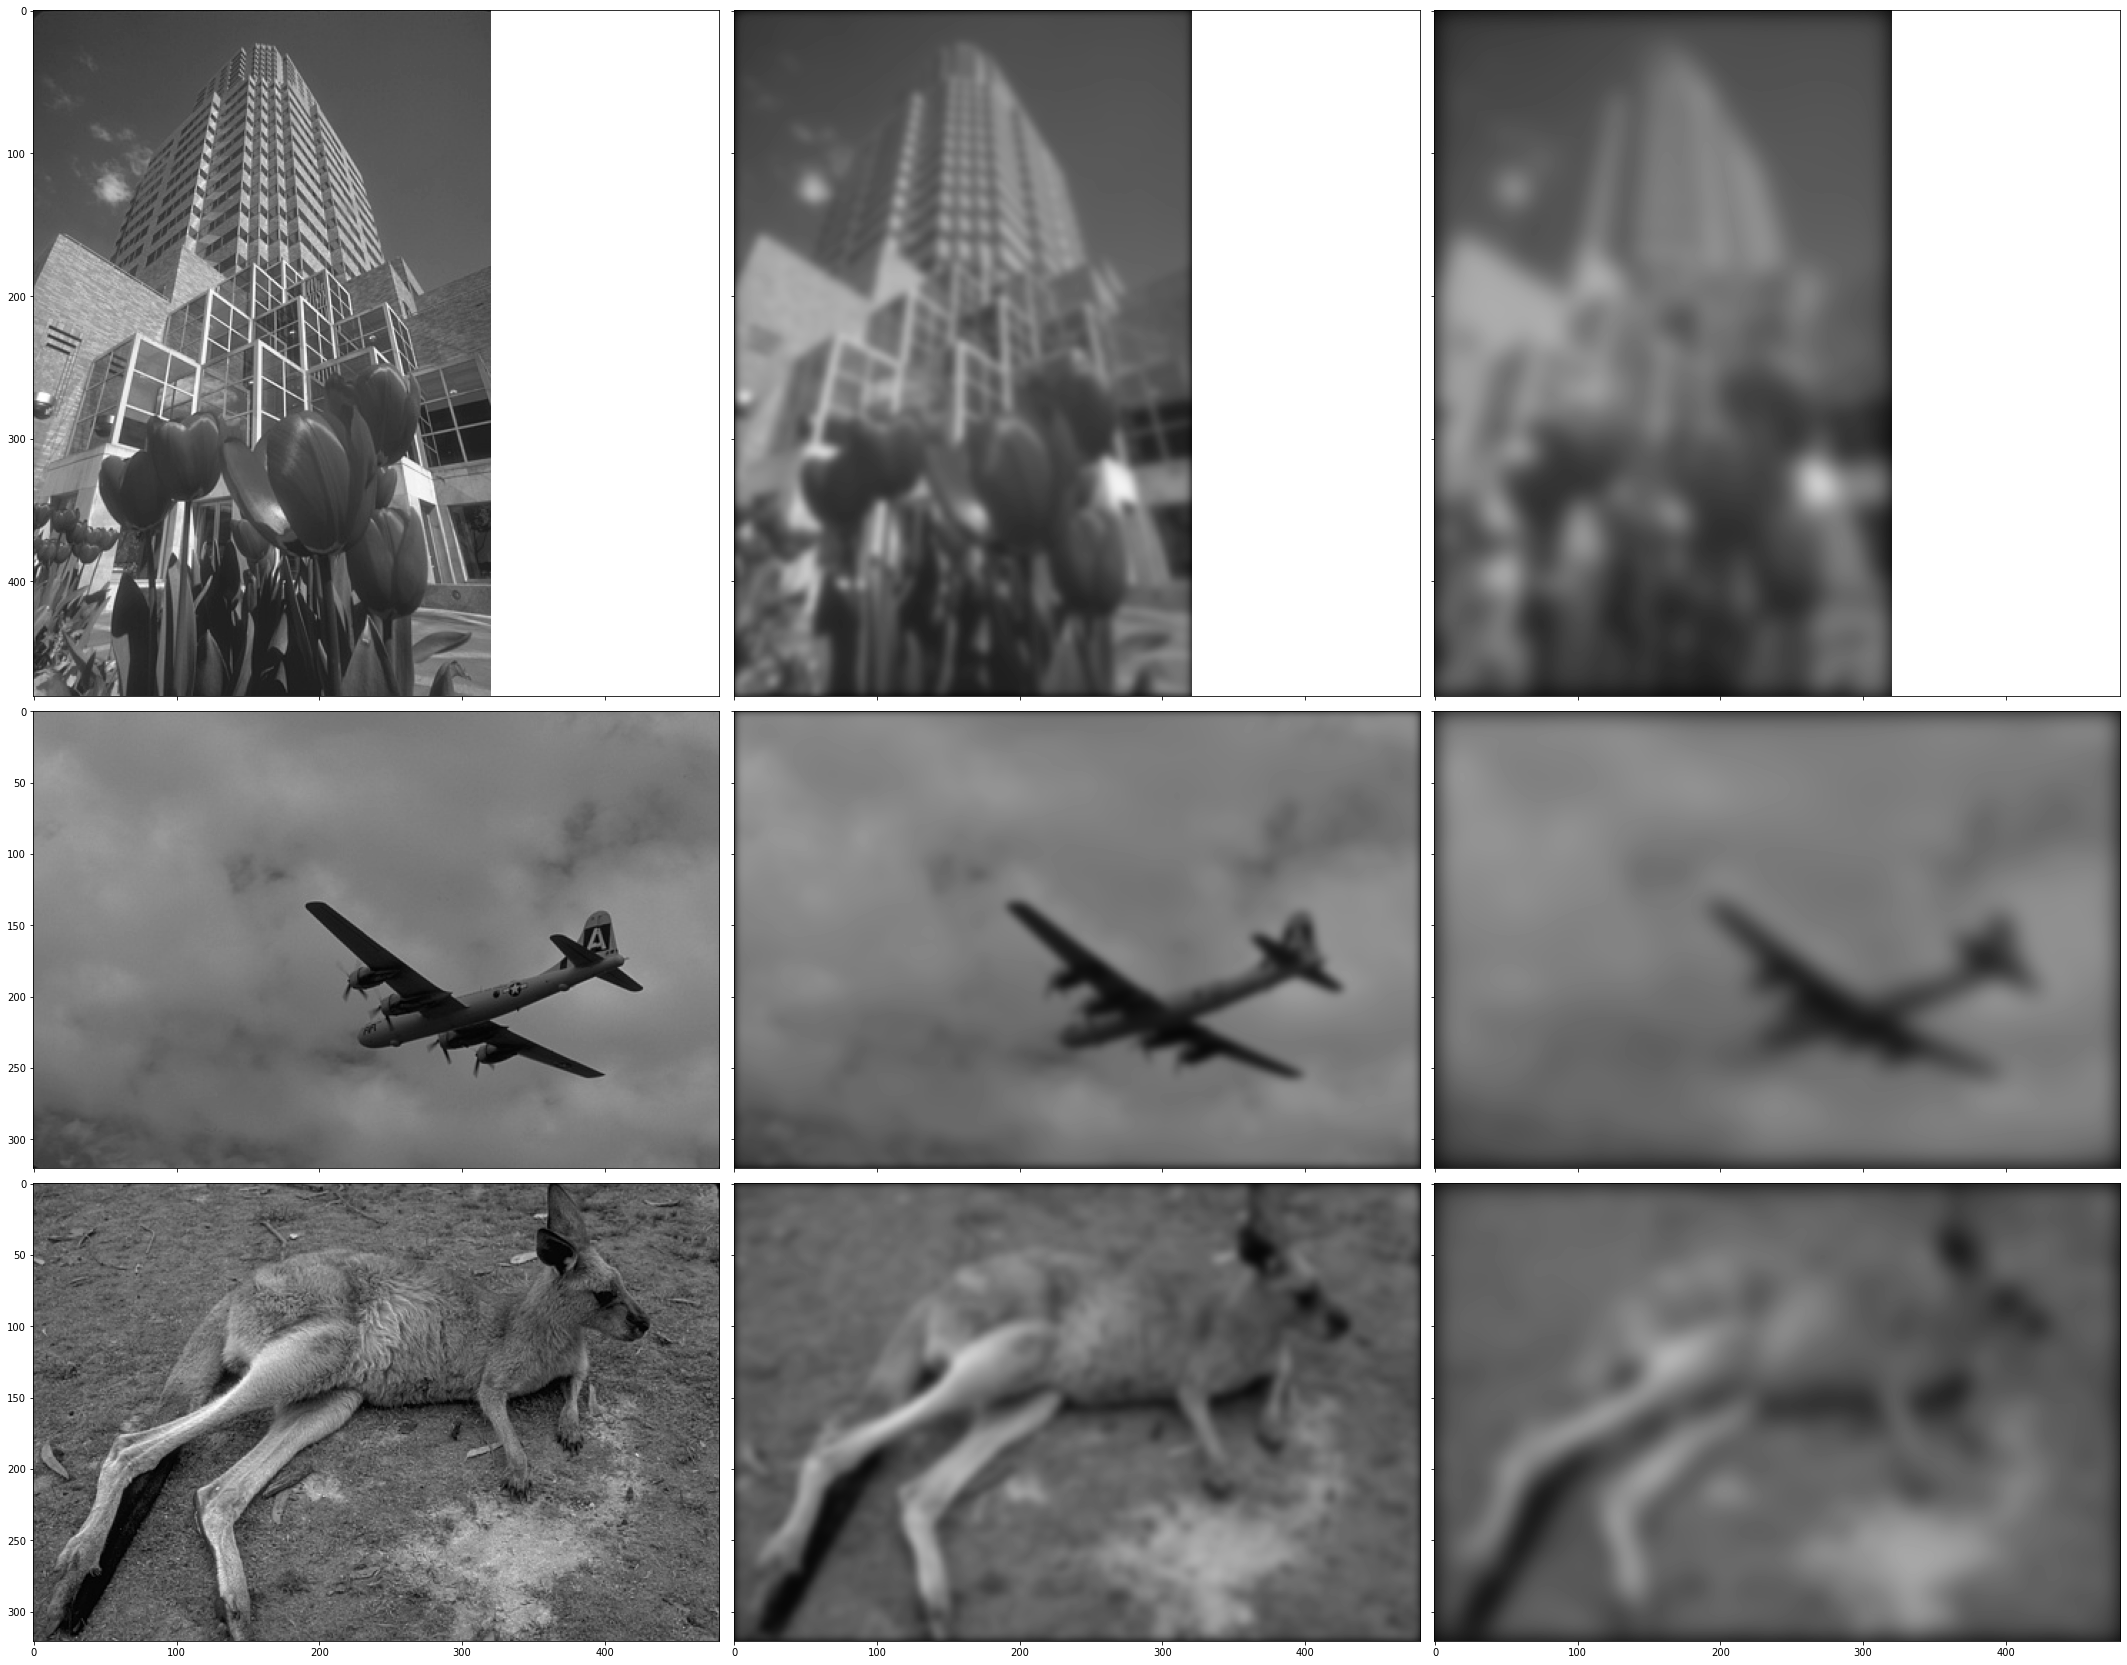

In [14]:
fig = plt.figure(figsize=(400, 30))
grid = ImageGrid(fig, 150,  # similar to subplot(111)
                 nrows_ncols=(3, 3),  # creates 3x3 grid of axes
                 axes_pad=0.2,  # pad between axes in inch.
                 )

# for axes in grid:  # TODO
#     axes.set_title("TITLE", fontdict=None, loc='center', color = "k")
#     axes.imshow(im)

for ax, im in zip(grid, smoothed_images_all2):
    # Iterating over the grid returns the Axes.
    ax.set_title("TITLE", fontdict=None, loc='center', color = "k")
    ax.imshow(im[1], cmap='gray', vmin=0, vmax=255)

plt.show()

In [ ]:
for 